# Pipeline Test Harness


* Module Name: pipeline.ipynb
* Description: Pipeline runner to evaluate performance

Copyright (C) 2025 J.Cincotta

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program. If not, see <https://www.gnu.org/licenses/>.


In [1]:
from welfareobs.utils.performance_monitor import PerformanceMonitor
from welfareobs.runner import Runner
from welfareobs.utils.config import Config
import matplotlib.pyplot as plt


cfg: Config = Config(
    "/project/config/non-rtsp-example.json",
    "/project/welfareobs/welfareobs"
)

runner: Runner = Runner(cfg)
runner.run(5) # this matches the performance-history-size configuration
runner.performance.save("/project/performance.csv")


INFO:datasets:PyTorch version 2.7.0 available.


Calling setup
camera-1 calling setup
root=/project/data/wod_2025/20250220 camera-filter=c1 time-filter=10->11 Types: ['.jpeg', '.jpg', '.png']
found 185 files
detection-1 calling setup


INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (BVRA/wildlife-mega-L-384)
INFO:detectron2.checkpoint.detection_checkpoint:[DetectionCheckpointer] Loading from /project/data/detectron2_models/mask_rcnn_R_101_FPN_3x/model_final_a3ec72.pkl ...
INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /project/data/detectron2_models/mask_rcnn_R_101_FPN_3x/model_final_a3ec72.pkl ...
INFO:fvcore.common.checkpoint:Reading a file from 'Detectron2 Model Zoo'
/usr/local/lib/python3.13/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


location-1 calling setup
Loaded config/camera-1.pkl: dims=((384, 384, 3))
aggregator calling setup
local-save calling setup
step-1: run=1 time=1.6689300537109375e-06 avg=0.0 sd=0
Filename: /project/data/wod_2025/20250220/c1_20250220_100001.jpg stamp: 1741602487.0 (2025-03-10 10:28:07)
step-2: run=1 time=0.3697316646575928 avg=0.37 sd=0
step-3: run=1 time=4.76837158203125e-07 avg=0.0 sd=0
Aggregator got 3 giraffe
Coordinates for Jimiyu: source=(58, 2) valid=(58, 2) clustered=(58, 2)
2025-03-10 10:28:07
Coordinates for Zarafa: source=(5, 2) valid=(5, 2) clustered=(5, 2)
2025-03-10 10:28:07
Coordinates for Ebo: source=(13, 2) valid=(13, 2) clustered=(13, 2)
2025-03-10 10:28:07
step-4: run=1 time=0.0020744800567626953 avg=0.002 sd=0
Writing sample 1 with 3 individuals
step-7: run=1 time=0.00011658668518066406 avg=0.0 sd=0
step-1: run=2 time=4.76837158203125e-07 avg=0.0 sd=0.0
Filename: /project/data/wod_2025/20250220/c1_20250220_100006.jpg stamp: 1741602492.0 (2025-03-10 10:28:12)
step-2: 

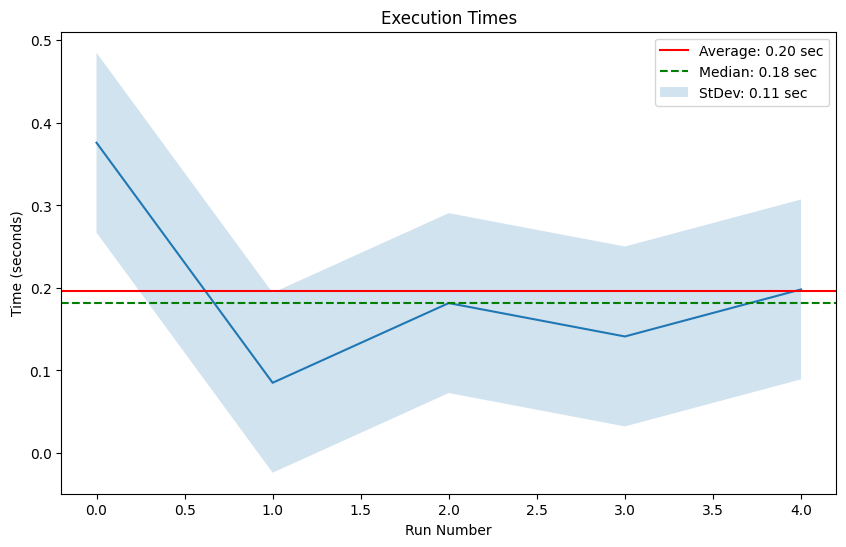

In [2]:
perf: PerformanceMonitor = runner.performance
execution_times = list(perf)

# Calculate statistics
avg_time = perf.average
median_time = perf.median
stdev_time = perf.stdev

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(execution_times)
plt.axhline(y=avg_time, color='r', linestyle='-', label=f'Average: {avg_time:.2f} sec')
plt.axhline(y=median_time, color='g', linestyle='--', label=f'Median: {median_time:.2f} sec')
plt.fill_between(range(len(execution_times)), [t - stdev_time for t in execution_times], [t + stdev_time for t in execution_times], alpha=0.2, label=f'StDev: {stdev_time:.2f} sec')
plt.title('Execution Times')
plt.xlabel('Run Number')
plt.ylabel('Time (seconds)')
plt.yscale('linear')
plt.legend()
plt.show()

